# PDA PROJECT 1: *BREAST CANCER DIAGNOSTIC DATASET*

Roberto Vergano
***

**TABLE OF CONTENTS**

1. Background information. 
2. Breast cancer diagnostic: Real-world dataset.
3. Model and synthesize the dataset.
4. Discussion.
5. References. 

## 1. BACKGROUND INFORMATION

***

Breast cancer is the most common cancer in women worldwide, with a great diversity in outcomes among individual patients. The ability to accurately predict a breast cancer outcome is important to patients, physicians, researchers, and policy makers. Many models have been developed and tested in different settings.(1)

Breast cancer is generally diagnosed through either screening or a symptom (e.g., pain or a palpable mass) that prompts a diagnostic exam. Screening of healthy women is associated with the detection of tumors that are smaller, have lower odds of metastasis, are more amenable to breast-conserving and limited axillary surgery, and are less likely to require chemotherapy.(2)

The size of a breast cancer at diagnosis has conventionally been thought of as a fundamental and critical determinant of clinical outcome. However, the tendency of some subtypes of breast cancer to behave aggressively, despite being small (</=1 cm in diameter), questions the premise that cancer size should always be considered in treatment decisions.(3)

### 1.2 BREAST CANCER WISCONSIN (DIAGNOSTIC) DATASET

In this project, we will review the Breast Cancer Wisconsin dataset which describes the characteristics of the tumor cells from breast cancer patients.(4)

This dataset has ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)    
b) texture (standard deviation of gray-scale values)    
c) perimeter    
d) area    
e) smoothness (local variation in radius lengths)    
f) compactness (perimeter^2 / area - 1.0)    
g) concavity (severity of concave portions of the contour)    
h) concave points (number of concave portions of the contour)    
i) symmetry    
j) fractal dimension ("coastline approximation" - 1) 

Depending on these features, the dataset predicts whether the tumor can be considered benign or malign. 

For this project, we are going to focus in the first four features which are closely related to size: radius, texture, perimeter and area. And we will try to replicate and model a dataset with the same characteristics. 

## 2. BREAST CANCER DIAGNOSTIC: REAL-WORLD DATASET

***

First, we are going to study the real dataset in order to replicate it. 

In [7]:
# Pandas for reading and manipulate the datasets
import pandas as pd
# Seaborn and matplotlib for data visualization. 
import seaborn as sns
import matplotlib.pyplot as plt
# Numpy to work with arrays. 
import numpy as np

Realdata will be our original breast cancer dataset.

In [8]:
# pd.read_csv from pandas to read the dataset.(5) 
realdata = pd.read_csv("data.csv")
realdata

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


We are going to extract the features from the realdata dataset which we are interested in: diagnosis, radius, texture, perimeter and area. Create a subset of data (df) from our full dataset.(6)

In [9]:
df = realdata[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean"]]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,M,17.99,10.38,122.80,1001.0
1,M,20.57,17.77,132.90,1326.0
2,M,19.69,21.25,130.00,1203.0
3,M,11.42,20.38,77.58,386.1
4,M,20.29,14.34,135.10,1297.0
...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0
565,M,20.13,28.25,131.20,1261.0
566,M,16.60,28.08,108.30,858.1
567,M,20.60,29.33,140.10,1265.0


This is the dataset we are going to try to replicate, so the next step is to find out the main attributes of this dataset to see how the data are distributed. For this task, we can use an integrated function from pandas "pd.DataFrame.describe".(7)

In [10]:
pd.DataFrame.describe(df)

,radius_mean,texture_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104
std,3.524049,4.301036,24.298981,351.914129
min,6.981000,9.710000,43.790000,143.500000
25%,11.700000,16.170000,75.170000,420.300000
50%,13.370000,18.840000,86.240000,551.100000
75%,15.780000,21.800000,104.100000,782.700000
max,28.110000,39.280000,188.500000,2501.000000


Using seaborn, we will visualize how the data is distributed.(8)

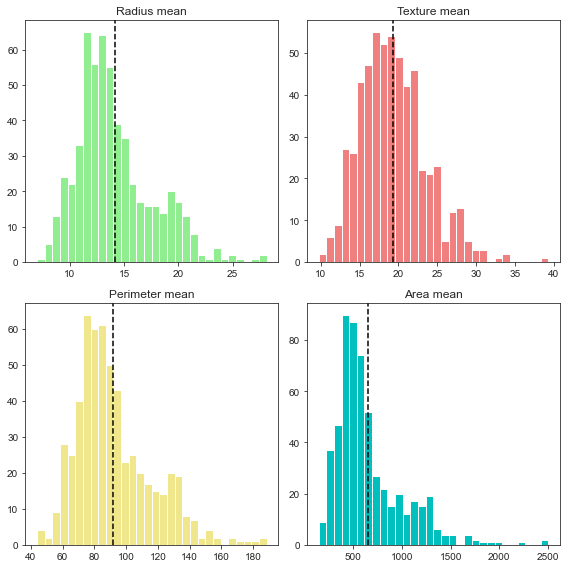

In [11]:
sns.set_style('ticks')

f, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Radius mean")
ax[0,1].set_title("Texture mean")
ax[1,0].set_title("Perimeter mean")
ax[1,1].set_title("Area mean")

ax[0,0].hist(df["radius_mean"], bins = 30, color="lightgreen")
ax[0,1].hist(df["texture_mean"], bins = 30, color="lightcoral")
ax[1,0].hist(df["perimeter_mean"], bins = 30, color="khaki")
ax[1,1].hist(df["area_mean"], bins = 30, color="c")

ax[0,0].axvline(df["radius_mean"].mean(), color ="k", linestyle = "dashed")
ax[0,1].axvline(df["texture_mean"].mean(), color ="k", linestyle = "dashed")
ax[1,0].axvline(df["perimeter_mean"].mean(), color ="k", linestyle = "dashed")
ax[1,1].axvline(df["area_mean"].mean(), color ="k", linestyle = "dashed")

plt.tight_layout()

In [ ]:
sns.pairplot(df, hue= "diagnosis")

## 3. MODEL AND SYNTHESIZE THE DATASET 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

realdata = pd.read_csv("data.csv")

df = realdata[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean"]]

diagnosis_mean= np.random.binomial(1,0.37,500)

diagnosis_list=[]
for i in diagnosis_mean:
    if i ==1:
        diagnosis_list.append("M")
    else:
        diagnosis_list.append("B")

radius_mean = np.clip(np.random.normal(np.mean(df["radius_mean"]),np.std(df["radius_mean"]),500),df["radius_mean"].min(),df["radius_mean"].max())

texture_mean = np.clip(np.random.normal(np.mean(df["texture_mean"]),np.std(df["texture_mean"]),500),df["texture_mean"].min(),df["texture_mean"].max())

perimeter_mean = np.clip(np.random.normal(np.mean(df["perimeter_mean"]),np.std(df["perimeter_mean"]),500),df["perimeter_mean"].min(),df["perimeter_mean"].max())

area_mean = np.clip(np.random.normal(np.mean(df["area_mean"]),np.std(df["area_mean"]),500),df["area_mean"].min(),df["area_mean"].max())

ds =pd.DataFrame({"diagnosis": diagnosis_list,"radius_mean":radius_mean,"texture_mean":texture_mean,"perimeter_mean":perimeter_mean,"area_mean":area_mean})

ds


In [ ]:
pd.DataFrame.describe(ds)

In [ ]:
import matplotlib.pyplot as plt

sns.set_style('ticks')

f, axes = plt.subplots(2,2,figsize=(10,8))

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

axes[0,0].hist(ds["radius_mean"], bins = 30, color="lightgreen")
axes[0,1].hist(ds["texture_mean"], bins = 30, color="lightcoral")
axes[1,0].hist(ds["perimeter_mean"], bins = 30, color="khaki")
axes[1,1].hist(ds["area_mean"], bins = 30, color="c")

axes[0,0].axvline(ds["radius_mean"].mean(), color ="k", linestyle = "dashed")
axes[0,1].axvline(ds["texture_mean"].mean(), color ="k", linestyle = "dashed")
axes[1,0].axvline(ds["perimeter_mean"].mean(), color ="k", linestyle = "dashed")
axes[1,1].axvline(ds["area_mean"].mean(), color ="k", linestyle = "dashed")

plt.tight_layout()

In [ ]:
rm =pd.DataFrame({"Real dataset": df["radius_mean"], "Simulated dataset":ds["radius_mean"]})
tm =pd.DataFrame({"Real dataset": df["texture_mean"], "Simulated dataset":ds["texture_mean"]})
pm =pd.DataFrame({"Real dataset": df["perimeter_mean"], "Simulated dataset":ds["perimeter_mean"]})
am =pd.DataFrame({"Real dataset": df["area_mean"], "Simulated dataset":ds["area_mean"]})

sns.set(style="ticks")

figure, axes = plt.subplots(2,2,figsize=(10,6))

figure.suptitle("Comparison Real data vs Simulated data")

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

sns.kdeplot(ax=axes[0,0], data=rm)
sns.kdeplot(ax=axes[0,1], data=tm)
sns.kdeplot(ax=axes[1,0], data=pm)
sns.kdeplot(ax=axes[1,1], data=am)

plt.tight_layout()

In [ ]:
sns.set(style="ticks")

figure, axes = plt.subplots(2,2,figsize=(20,10))

figure.suptitle("Comparison Real data vs Simulated data", fontsize =20)

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

sns.scatterplot(ax=axes[0,0], data=rm)
sns.scatterplot(ax=axes[0,1], data=tm)
sns.scatterplot(ax=axes[1,0], data=pm)
sns.scatterplot(ax=axes[1,1], data=am)

axes[0,0].axhline(y= np.mean(df["radius_mean"]), color='red', linestyle='-')
axes[0,1].axhline(y= np.mean(df["texture_mean"]), color='red', linestyle='-')
axes[1,0].axhline(y= np.mean(df["perimeter_mean"]), color='red', linestyle='-')
axes[1,1].axhline(y= np.mean(df["area_mean"]), color='red', linestyle='-')

plt.tight_layout()

In [ ]:
sns.set(style="ticks")

figure, axes = plt.subplots(2,2,figsize=(20,10))

figure.suptitle("Box plots: Comparison Real data vs Simulated data", fontsize =20)

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

sns.boxplot(ax=axes[0,0], data=rm)
sns.boxplot(ax=axes[0,1], data=tm)
sns.boxplot(ax=axes[1,0], data=pm)
sns.boxplot(ax=axes[1,1], data=am)

plt.tight_layout()

In [ ]:
g = sns.pairplot(ds, hue="diagnosis",height=3.5)
g.fig.suptitle("Simulated dataset features comparison", y =1.05)

**DATA PREDICTION**

In [43]:
#REAL DATASET VALUES PREDICTION

import sklearn.neighbors as nei
from sklearn.model_selection import train_test_split

inputs_df = df[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
outputs_df = df["diagnosis"]

def pred():
    sample_df = df.sample(1)
    s = sample_df[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inputs_df,outputs_df)
    (knn.predict(inputs_df)==outputs_df).sum()
    inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs_df, outputs_df, test_size=0.33)
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inputs_train,outputs_train)
    (knn.predict(inputs_train)==outputs_train).sum()
    print("Random sample from real dataframe:")
    print()
    print(sample_df)
    print()
    print("Prediction from simulated dataframe:", knn.predict(s)) 
    print()
    a = knn.predict(s)
    b = np.array(sample_df["diagnosis"])
    while a == b:
        pred()
        a != b
        break

pred()



Random sample from real dataframe:

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
97         B        9.787         19.94           62.11      294.5

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
2         M        19.69         21.25           130.0     1203.0

Prediction from simulated dataframe: ['M']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
398         B        11.06         14.83           70.31      378.2

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
240         B        13.64          15.6           87.38      575.3

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
557         B        9.423        

In [55]:
def sim():
    sample_ds = ds.sample(1)
    si = sample_ds[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inputs_df,outputs_df)
    (knn.predict(inputs_df)==outputs_df).sum()
    inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs_df, outputs_df, test_size=0.33)
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inputs_train,outputs_train)
    (knn.predict(inputs_train)==outputs_train).sum()
    print("Random sample from real dataframe:")
    print()
    print(sample_ds)
    print()
    print("Prediction from simulated dataframe:", knn.predict(si)) 
    print()
    a = knn.predict(si)
    b = np.array(sample_ds["diagnosis"])
    while a == b:
        pred()
        a != b
        break

sim()

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean   area_mean
198         B     14.11556     27.689071       74.191418  653.307928

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
478         B        11.49         14.59           73.99      404.9

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
123         B         14.5         10.89           94.28      640.7

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
63         B        9.173         13.86            59.2      260.9

Prediction from simulated dataframe: ['B']

Random sample from real dataframe:

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean
344         B        11.71  

In [ ]:
a = outputs_train.size
a

In [ ]:
#SIMULATED DATASET PREDICTION REAL AGAINST SIMULATED

inputs_ds = ds[["radius_mean","texture_mean","perimeter_mean","area_mean"]]

outputs_train.size

def sim():
    sample_df = df.sample(1)
    s = sample_df[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
    inp = inputs_ds.sample(outputs_train.size)
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inp,outputs_train)
    (knn.predict(inp)==outputs_train).sum()
    inputs_tr, inputs_te, outputs_tr, outputs_te = train_test_split(inp, outputs_train, test_size=0.33)
    knn = nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(inputs_tr,outputs_tr)
    (knn.predict(inputs_tr)==outputs_tr).sum()
    print("Random sample from real dataframe:")
    print()
    print(sample_df)
    print()
    print("Prediction from simulated dataframe:", knn.predict(s)) 
    print()
    r = knn.predict(s)
    t = np.array(sample_df["diagnosis"])
    while r == t:
        sim()
        r != t
        break
        
sim()

In [ ]:
import sklearn.datasets as sk

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml

sk.load_files(C\Users\ROB\Desktop\PDA22\data.csv)


**SAMPLE FROM REAL DATASET**

In [ ]:
s_df = df.sample(200)
print(s_df)
print()
print("SAMPLE DATASET DESCRIPTION")
print()
print(pd.DataFrame.describe(s_df))
print()

sns.set_style('ticks')

f, axes = plt.subplots(2,2,figsize=(10,8))

f.suptitle("Histograms from real dataset sample", fontsize =20)

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

axes[0,0].hist(s_df["radius_mean"], bins = 30, color="lightgreen")
axes[0,1].hist(s_df["texture_mean"], bins = 30, color="lightcoral")
axes[1,0].hist(s_df["perimeter_mean"], bins = 30, color="khaki")
axes[1,1].hist(s_df["area_mean"], bins = 30, color="c")

axes[0,0].axvline(s_df["radius_mean"].mean(), color ="k", linestyle = "dashed")
axes[0,1].axvline(s_df["texture_mean"].mean(), color ="k", linestyle = "dashed")
axes[1,0].axvline(s_df["perimeter_mean"].mean(), color ="k", linestyle = "dashed")
axes[1,1].axvline(s_df["area_mean"].mean(), color ="k", linestyle = "dashed")

plt.tight_layout()
plt.show()
print()

print("COMPARISON REAL DATASET VS SAMPLE FROM REAL DATASET")

srm =pd.DataFrame({"Real dataset": df["radius_mean"], "Simulated dataset":s_df["radius_mean"]})
stm =pd.DataFrame({"Real dataset": df["texture_mean"], "Simulated dataset":s_df["texture_mean"]})
spm =pd.DataFrame({"Real dataset": df["perimeter_mean"], "Simulated dataset":s_df["perimeter_mean"]})
sam =pd.DataFrame({"Real dataset": df["area_mean"], "Simulated dataset":s_df["area_mean"]})

sns.set(style="ticks")

figure, axes = plt.subplots(2,2,figsize=(10,6))

figure.suptitle("Comparison Real data vs Simulated data")

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

sns.kdeplot(ax=axes[0,0], data=srm)
sns.kdeplot(ax=axes[0,1], data=stm)
sns.kdeplot(ax=axes[1,0], data=spm)
sns.kdeplot(ax=axes[1,1], data=sam)

plt.tight_layout()
print()

print("BOXPLOTS COMPARISON")

sns.set(style="ticks")

figure, axes = plt.subplots(2,2,figsize=(20,10))

figure.suptitle("Box plots: Comparison Real data vs Realdataset sample", fontsize =20)

axes[0,0].set_title("Radius mean")
axes[0,1].set_title("Texture mean")
axes[1,0].set_title("Perimeter mean")
axes[1,1].set_title("Area mean")

sns.boxplot(ax=axes[0,0], data=srm)
sns.boxplot(ax=axes[0,1], data=stm)
sns.boxplot(ax=axes[1,0], data=spm)
sns.boxplot(ax=axes[1,1], data=sam)

plt.tight_layout()
print()

g = sns.pairplot(s_df, hue="diagnosis",height=3.5)
g.fig.suptitle("Realdataset sample features comparison", y =1.05)

## 4. DISCUSSION 

## 5. REFERENCES

(1) Phung MT, Tin Tin S, Elwood JM. Prognostic models for breast cancer: a systematic review. BMC Cancer. 2019 Mar 14;19(1):230. doi: 10.1186/s12885-019-5442-6. PMID: 30871490; PMCID: PMC6419427.   
(2) Katsura C, Ogunmwonyi I, Kankam HK, Saha S. Breast cancer: presentation, investigation and management. Br J Hosp Med (Lond). 2022 Feb 2;83(2):1-7. doi: 10.12968/hmed.2021.0459. Epub 2022 Feb 7. PMID: 35243878.   
(3) Foulkes WD, Reis-Filho JS, Narod SA. Tumor size and survival in breast cancer--a reappraisal. Nat Rev Clin Oncol. 2010 Jun;7(6):348-53. doi: 10.1038/nrclinonc.2010.39. Epub 2010 Mar 23. PMID: 20309006.   
(4) Breast Cancer Wisconsin Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download    
(5) https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html    
(6) https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html    
(7) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
(8) https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8